In [36]:
import scipy.signal
import numpy as np
import scipy.io as scio
import matplotlib.pyplot as plt
import pandas as pd

# 函数

In [90]:
def stft_plot(input_signal, fs=90.0, window='hann', nperseg=15, noverlap=13, ylimt = None):
    '''
    :param input_signal:
    :param fs: 时间序列的采样频率
    :param window:
    :param nperseg: 每个段的长度
    :param noverlap: 段之间重叠的点数，如果没有则noverlap=nperseg/2
    :return: f, t, nd
    '''
    
    f, t, nd = scipy.signal.stft(input_signal, fs=fs, window=window, nperseg=nperseg, noverlap=noverlap)
    
    # -------- plot time-frequency --------
    
    plt.figure(figsize=(10, 5))

    plt.subplot(2, 1, 1)
    plt.pcolormesh(t, f, np.abs(nd))
    plt.title('STFT')
    plt.ylabel('frequency')
    plt.xlabel('time')
    
    if ylimt is not None:
        plt.ylim(ylimt[0], ylimt[1])
    
    # -------- plot time-amplitude --------
    
    plt.subplot(2, 1, 2)
    plt.plot(input_signal)
    
    plt.xlim(0,input_signal.shape[0])
    plt.show()
    
    return f, t, nd


def filters(cutoff_low, cutoff_high, data, fs = 1000):
    cutoff_low = cutoff_low/(fs/2)
    b,a = scipy.signal.butter(6,cutoff_low,'low',analog=False)
    data_f_low = scipy.signal.filtfilt(b,a,data)
    
    cutoff_high = cutoff_high/(fs/2)
    b,a = scipy.signal.butter(3,cutoff_high,'high',analog=False)
    data_f_low_high = scipy.signal.filtfilt(b,a,data_f_low)
    
    return data_f_low_high

# 数据集

## 老师那个数据集 (mat)

老师这个数据集，采样率是90，所以感觉时频效果一般，但是还是可以看出变化的吧。。。

In [91]:
csi = scio.loadmat(r'../data/test_data_split_amp.mat')
csi['test_data'].shape

(278, 52, 192)

input_signal.shape:  (192,)


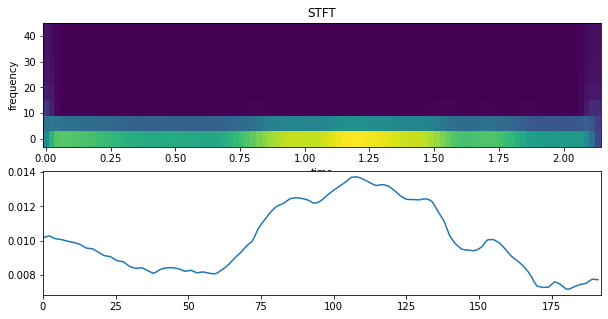

f  (8,) t (97,) nd (8, 97)


In [92]:
input_signal = csi['test_data'][1,0,:]
print('input_signal.shape: ', input_signal.shape)

f, t, nd = stft_plot(input_signal, fs=90.0, window='hann', nperseg=15, noverlap=13)
# 这个采样率小，数据长度也小，所以窗口长度小 nperseg，overlap可以让他看起来更加平滑一点

print('f ',f.shape, 't', t.shape, 'nd', nd.shape)

## 数据集2 (csv)

In [93]:
data = pd.read_csv('../data/input_walk_170308_1307_20.csv',header=None).values
data.shape

(19995, 181)

input_signal.shape:  (19995,)


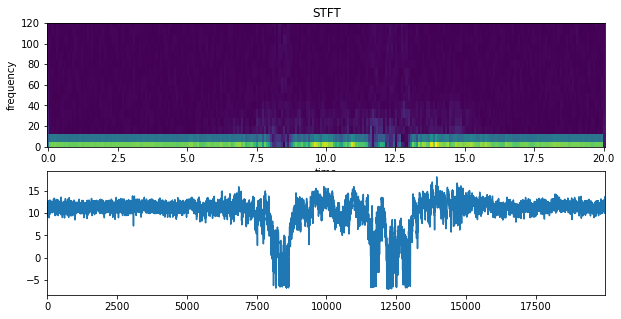

f  (63,) t (268,) nd (63, 268)


In [94]:
input_signal = data[:,1]
print('input_signal.shape: ', input_signal.shape)

f, t, nd = stft_plot(input_signal, fs=1000, window='hann', nperseg=125, noverlap=50, ylimt=[0, 120])

print('f ',f.shape, 't', t.shape, 'nd', nd.shape)

### 滤波后

input_signal.shape:  (19995,)


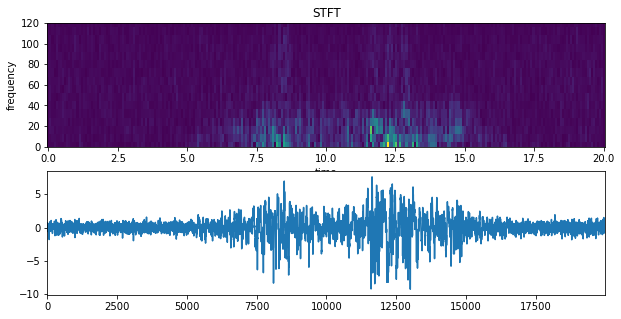

f  (63,) t (268,) nd (63, 268)


In [96]:
input_signal_f = filters(120,2,data[:,1])
print('input_signal.shape: ', input_signal_f.shape)

f, t, nd = stft_plot(input_signal_f, fs=1000, window='hann', nperseg=125, noverlap=50, ylimt=[0, 120])

print('f ',f.shape, 't', t.shape, 'nd', nd.shape)

## 数据集3 (dat)

In [97]:
from CSI_reader.wifilib import *

In [99]:
bf = read_bf_file('../data/userA-1-1-1-1-r1.dat')

In [100]:
csi2_list = list(map(get_scale_csi, bf))
csi2_np = np.array(csi2_list)

csi2_amp = (np.abs(csi2_np))
csi2_amp.shape

(1479, 1, 3, 30)

input_signal.shape:  (1479,)


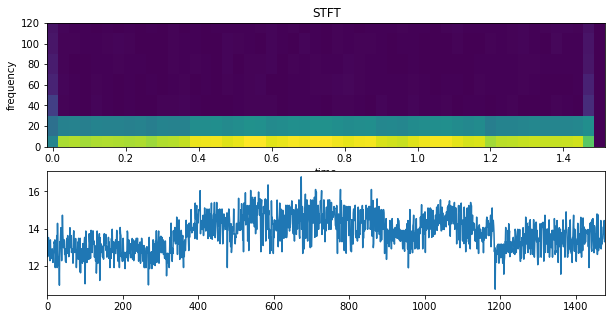

f  (26,) t (51,) nd (26, 51)


In [113]:
input_signal = csi2_amp[:,0,2,10]
print('input_signal.shape: ', input_signal.shape)

f, t, nd = stft_plot(input_signal, fs=1000, window='hann', nperseg=50, noverlap=20, ylimt=[0, 120])

print('f ',f.shape, 't', t.shape, 'nd', nd.shape)

### 滤波后

input_signal.shape:  (1479,)


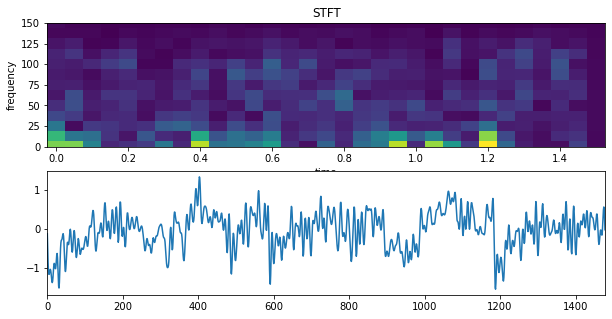

f  (41,) t (31,) nd (41, 31)


In [122]:
input_signal_f = filters(120,2,csi2_amp[:,0,2,10])
print('input_signal.shape: ', input_signal_f.shape)

f, t, nd = stft_plot(input_signal_f, fs=1000, window='hann', nperseg=80, noverlap=30, ylimt=[0, 150])

print('f ',f.shape, 't', t.shape, 'nd', nd.shape)